In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# Load data

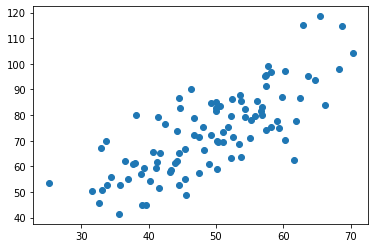

In [2]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X = data[:, 0]
Y = data[:, 1]
plt.scatter(X, Y, label="Points")

X = np.array(X)
Y = np.array(Y)

# Build model

In [3]:
model = Sequential()
dense = Dense(1,input_shape=(1,))
model.add(dense)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae","mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Fit model

In [4]:
model.fit(X,Y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 9196.3896 - mae: 93.9105 - mse: 9196.3896
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 9157.4541 - mae: 93.7103 - mse: 9157.4541
Epoch 3/1000
4/4 [==============================] - 0s 1000us/step - loss: 9118.5400 - mae: 93.5099 - mse: 9118.5400
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 9080.2451 - mae: 93.3105 - mse: 9080.2451
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 9042.0811 - mae: 93.1112 - mse: 9042.0811
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 9003.4736 - mae: 92.9116 - mse: 9003.4736
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 8966.5400 - mae: 92.7179 - mse: 8966.5400
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 8929.5293 - mae: 92.5252 - mse: 8929.5293
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 8892.9727 - m

# Check errors

In [5]:
Y_pred = model.predict(X)[:,0]
E_pred = ((Y-Y_pred)**2).mean()
#read weights from the network 
pa, pb = model.get_weights()
pa = pa[0,0]
pb = pb[0]
print("Predicted coeficients: a={:.3f} b={:.3f}, error={:.5f}".format(pa,pb,E_pred))

Predicted coeficients: a=1.435 b=1.892, error=110.05877


# Calculation of coefficients

In [6]:
avg_X = np.average(X)
avg_Y = np.average(Y)
ca = np.sum((X-avg_X)*(Y-avg_Y)) / np.sum((X-avg_X)*(X-avg_X))
cb = avg_Y - ca*avg_X
Y_calc = ca*X+cb
E_calc = ((Y-Y_calc)**2).mean()
print("Calculated coeficients: a={:.3f} b={:.3f}, error={:.5f}".format(ca,cb,E_calc))

Calculated coeficients: a=1.287 b=9.909, error=107.47044


# Plot

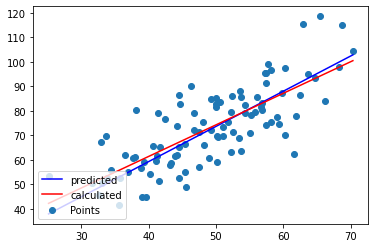

In [7]:
plt.scatter(X, Y, label="Points")
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color=(0,0,1), label="predicted")  # predicted line
plt.plot([min(X), max(X)], [min(Y_calc), max(Y_calc)], color=(1,0,0), label="calculated")  # calculated line
plt.legend(loc='lower left')    
plt.show()